# Machine learning project

## import librarys

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from datetime import timedelta
import pandas_profiling
from sklearn.preprocessing import StandardScaler
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from dateutil.rrule import rrule, MONTHLY
from dateutil.parser import parse
#from sklearn.linear_model import Ridge, Lasso, ElasticNet

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### functions

In [54]:
#plot predict and real data by month with std 
def plot_predict_std(startdt, enddt, y, predict, title):
    dates_by_month = list(rrule(MONTHLY, dtstart=parse(startdt), until=parse(enddt)))
    df_p = pd.DataFrame({'dates_by_month': dates_by_month, 'TIME_PERIOD': predict})
    plt.errorbar(df_p['dates_by_month'], df_p['TIME_PERIOD'], np.std(predict),label='predict', fmt='.k', ecolor='lightgray')
    plt.title(title)
    plt.plot(y, label='real rate')
    plt.legend()
    plt.show()
#plot predict and real data by month     
def plot_predict(startdt, enddt, y, predict, title):
    dates_by_month = list(rrule(MONTHLY, dtstart=parse(startdt), until=parse(enddt)))
    df_p = pd.DataFrame({'dates_by_month': dates_by_month, 'TIME_PERIOD': predict})
    plt.plot(df_p['dates_by_month'], df_p['TIME_PERIOD'], label='predict')
    plt.title(title)
    plt.plot(y, label='real rate')
    plt.legend()
    plt.show()## import data
# Us plot_predict and plot_predict_std together  
def plot_predict_and_std(startdt, enddt, y, predict, title):   
    plot_predict(startdt, enddt, y, predict, title)
    plot_predict_std(startdt, enddt, y, predict, title)

In [3]:
#calculate Adj R2

def Adj_R2(r2, X_train, X):
    r2 = r2
    n= len(X_train)
    p = len(X.columns)
    adj_R2 = 1- ((1-r2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
    return adj_R2

In [4]:
#add Adj R2 to df
def add_Adj_R2(full_eva, X_train, X):
    lis = list()
    for r2 in full_eva['r2_score']:
        lis.append(Adj_R2(r2, X_train, X))        
    full_eva['Adj_R2'] = lis
    return full_eva

In [5]:
# return Model evaluate r2_score and MSE
def Model_Evaluate(X_test, y_test, fit_modle, modle_name):
    results = dict()
    y_pred = fit_modle.predict(X_test)
    results['modle_name'] = modle_name
    results['MSE'] = mean_squared_error(y_test, y_pred)
    results['r2_score'] = r2_score(y_test, y_pred)
    
    return results    

In [6]:
def fitting_MSE(modke_fit, X_train, X_test, y_train):

    train_predictions = modke_fit.predict(X_train)
    test_predictions = modke_fit.predict(X_test)
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    print(f"Training MSE: {train_mse:.4f}")
    print(f"Testing MSE: {test_mse:.4f}")

## import data

In [7]:
## import librarys#Representative Exchange Rate US dollar/New Israeli shekel
exchange_Rate = pd.read_csv("EXR.csv")
#Makam - Short term loans
MCM = pd.read_csv("ACC.csv")
#Currency in circulation
Currency_in_Circulation = pd.read_csv("ACC (1).csv")
#Foreign Exchange Reserves in NIS
Foreign_exchange_Reserves = pd.read_csv("ACC (2).csv")
#Trade Turnover in Options of Domestic Banks (Domestic Interbank)
Trade_Bank = pd.read_csv("DRV.csv")
#Trade Turnover in Options of Domestic residents
Trade_Residents = pd.read_csv("DRV (1).csv")
#Trade Turnover in Swaps of Foreign residents
Trade_Foreign = pd.read_csv("DRV (2).csv")
#Trade Turnover in Swaps of Foreign Financial Institutions
Trade_Foreign_Institutions = pd.read_csv("DRV (3).csv")
#Tel Aviv Inter-Bank Offered Rate (Telbor) - 1 month
Offered_Rate = pd.read_csv("TLB.csv")
#Consumer's index - Fruits and vegetables
Fruits_And_Vegetables = pd.read_csv("PRI.csv")

full_data = [exchange_Rate, MCM, Currency_in_Circulation, Foreign_exchange_Reserves ,Trade_Bank , Trade_Residents, Trade_Foreign, Trade_Foreign_Institutions, Offered_Rate, Fruits_And_Vegetables]
col_names = ["exchange_Rate", "MCM", "Currency_in_Circulation", "Foreign_exchange_Reserves" ,"Trade_Bank" , "Trade_Residents", "Trade_Foreign", "Trade_Foreign_Institutions", "Offered_Rate", "Fruits_And_Vegetables"]

### exchange Rate by day all data

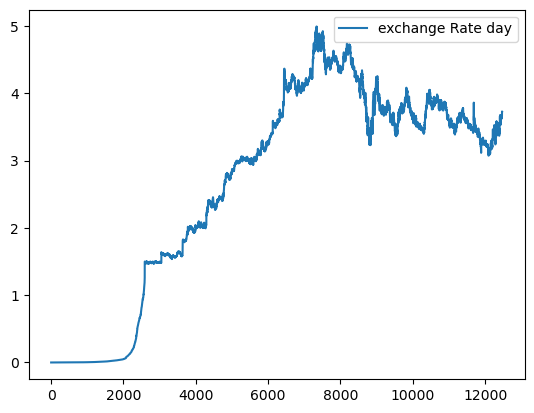

In [8]:
plt.plot(exchange_Rate["OBS_VALUE"], label='exchange Rate day')
plt.legend()
plt.show()

## Connecting and summariz by month

In [9]:

new_df = pd.DataFrame()
index = 0
for df in full_data:
    
    M_sum = pd.DataFrame()
    df1 = pd.DataFrame()
    
    df1[['TIME_PERIOD', col_names[index]]] = df[['TIME_PERIOD', 'OBS_VALUE']]
    df1['TIME_PERIOD'] = pd.to_datetime(df1['TIME_PERIOD'])
    M_sum = df1.groupby(pd.Grouper(key='TIME_PERIOD', freq='M')).mean()
    ## import data
    if new_df.empty:
        new_df = M_sum
        
    else:
        new_df = pd.merge(new_df, M_sum, on='TIME_PERIOD')
    
    index = index+1

## First exploration of the data

In [10]:
new_df

,exchange_Rate,MCM,Currency_in_Circulation,Foreign_exchange_Reserves,Trade_Bank,Trade_Residents,Trade_Foreign,Trade_Foreign_Institutions,Offered_Rate,Fruits_And_Vegetables
TIME_PERIOD,,,,,,,,,,
2008-01-31,3.750909,75462.379278,28723.655994,28713.324736,93.447619,420.395379,1742.179544,1741.854483,4.513913,76.397184
2008-02-29,3.608429,74977.759528,28668.732322,28582.611943,84.788796,286.219984,1753.799717,1753.657738,4.406190,81.319848
2008-03-31,3.510850,74443.534456,29471.479129,29539.300388,76.559980,366.685978,2193.817056,2308.429996,3.837619,77.036491
2008-04-30,3.519682,74505.871770,30544.066859,29478.273069,45.924171,244.388227,1527.003366,1526.672535,3.613636,80.936263
2008-05-31,3.378800,74618.587865,30304.159961,29958.334676,61.198410,297.579931,1745.418153,1745.059061,3.758571,80.936263
...,...,...,...,...,...,...,...,...,...,...
2022-12-31,3.451571,210127.167986,119426.089146,194217.921190,49.664968,195.062620,2460.881548,2577.394955,3.387667,98.233557
2023-01-31,3.445286,236245.127388,118543.628955,200984.939485,57.029232,309.368394,3119.658391,3119.365740,3.765095,97.900000
2023-02-28,3.543150,251431.448747,118880.495500,196279.326725,60.957159,437.913939,2480.595439,2480.595439,4.034579,100.900000


#### Look with pandas_profiling

In [11]:
# import pandas_profiling
# profile = new_df.profile_report()
# profile.to_file(output_file="output.html")## Connecting and summarizing data

#### exchange Rate

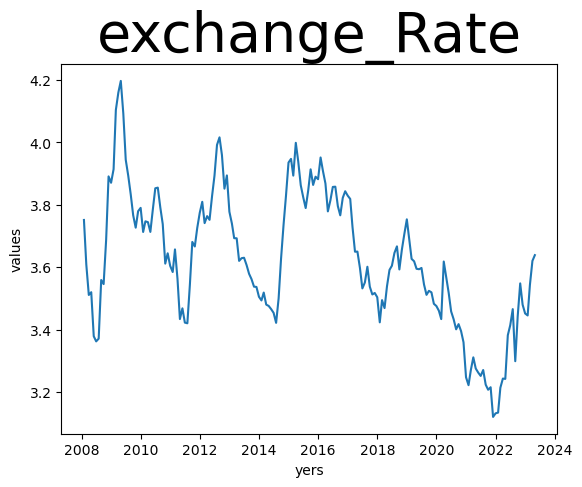

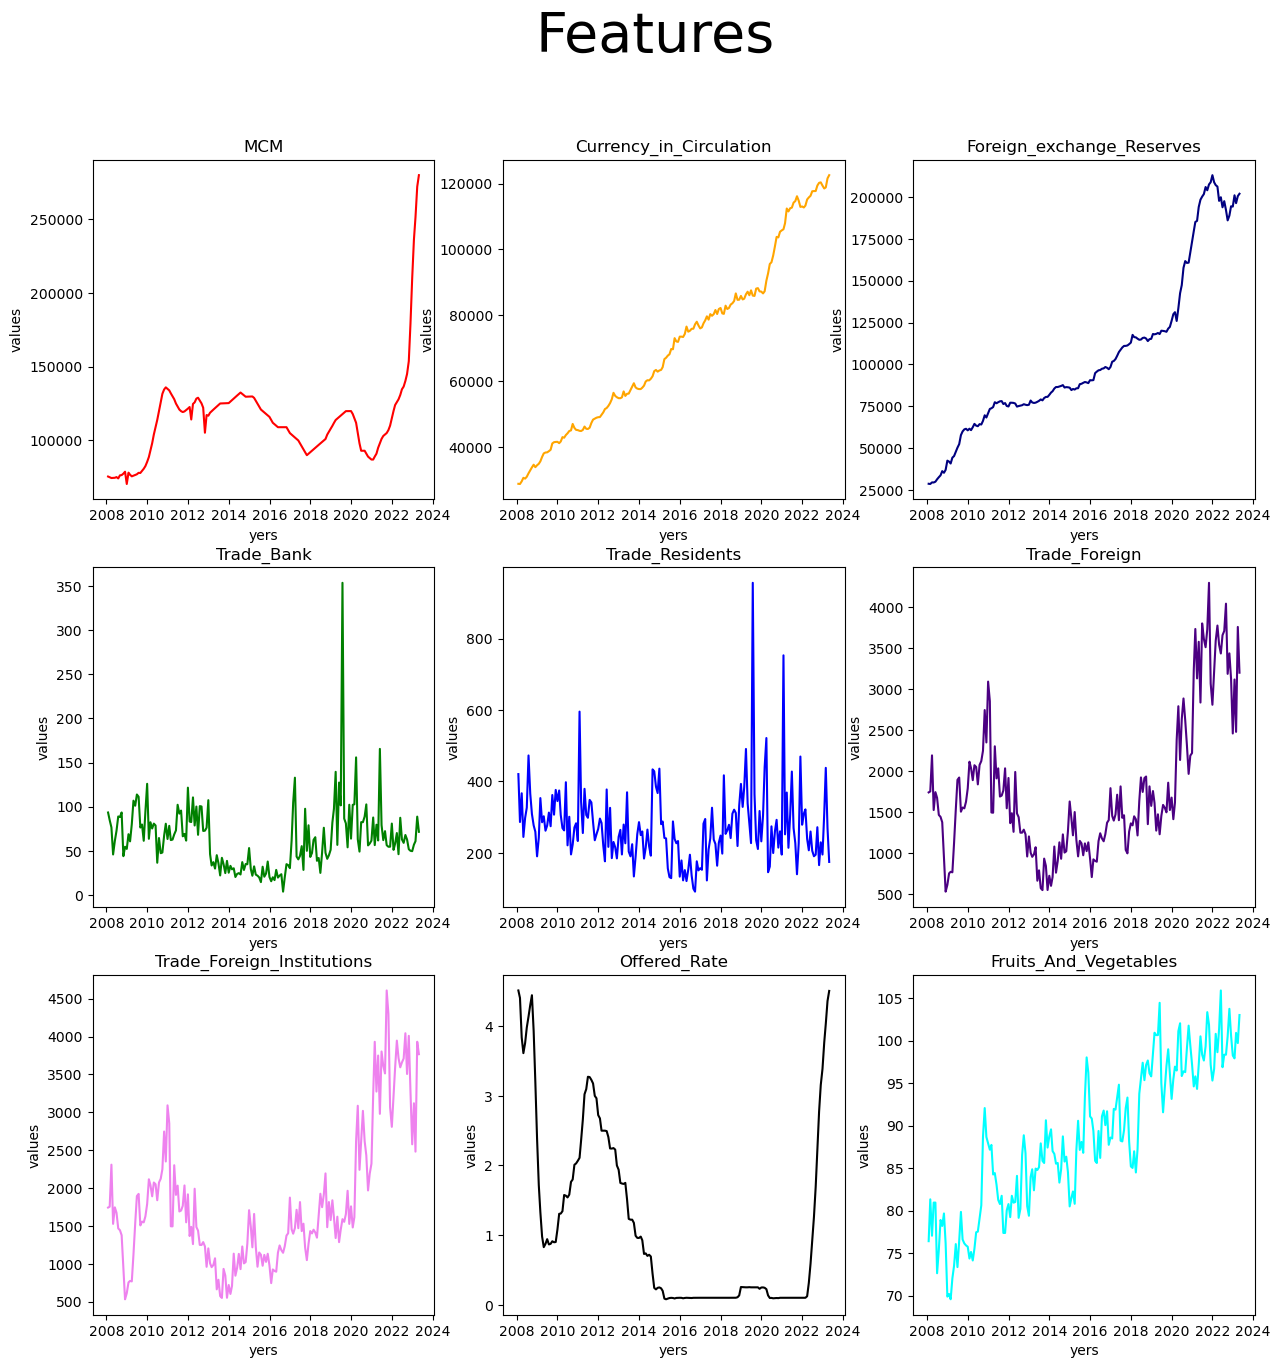

In [12]:
plt.plot(new_df["exchange_Rate"])
plt.xlabel("yers")
plt.ylabel("values")
plt.title("exchange_Rate", fontsize=40)


fig, axs = plt.subplots(3, 3, figsize=(15, 15))#, sharey=True)
colors = ['red', 'orange', 'navy', 'green', 'blue', 'indigo', 'violet', 'black', 'cyan']
index = 1
for i in range(0,3):
    for j in range(0,3):
        axs[i][j].plot(new_df[col_names[index]], color = colors[index-1] )
        axs[i][j].set_title(col_names[index])
        axs[i][j].set_xlabel("yers")
        axs[i][j].set_ylabel("values")  
        index = index + 1   
fig.suptitle('Features', fontsize=40)
plt.show()

### check Correlations

In [13]:
corr = new_df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,exchange_Rate,MCM,Currency_in_Circulation,Foreign_exchange_Reserves,Trade_Bank,Trade_Residents,Trade_Foreign,Trade_Foreign_Institutions,Offered_Rate,Fruits_And_Vegetables
exchange_Rate,1.00,-0.07,-0.57,-0.66,-0.10,-0.16,-0.59,-0.59,0.06,-0.54
MCM,-0.07,1.00,0.37,0.39,-0.11,-0.06,0.24,0.26,0.28,0.36
Currency_in_Circulation,-0.57,0.37,1.00,0.97,0.00,-0.07,0.62,0.64,-0.44,0.89
Foreign_exchange_Reserves,-0.66,0.39,0.97,1.00,0.05,-0.02,0.73,0.75,-0.34,0.84
Trade_Bank,-0.10,-0.11,0.00,0.05,1.00,0.60,0.22,0.21,0.16,-0.02
Trade_Residents,-0.16,-0.06,-0.07,-0.02,0.60,1.00,0.12,0.10,0.10,-0.07
Trade_Foreign,-0.59,0.24,0.62,0.73,0.22,0.12,1.00,0.99,0.04,0.50
Trade_Foreign_Institutions,-0.59,0.26,0.64,0.75,0.21,0.10,0.99,1.00,0.04,0.53
Offered_Rate,0.06,0.28,-0.44,-0.34,0.16,0.10,0.04,0.04,1.00,-0.41
Fruits_And_Vegetables,-0.54,0.36,0.89,0.84,-0.02,-0.07,0.50,0.53,-0.41,1.00


### describe

In [47]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
exchange_Rate,184.0,3.624935,0.216791,3.120500,3.478623,3.614566,3.789159,4.195938
MCM,184.0,113659.106614,29924.391519,70398.060475,95938.775130,114487.714423,125150.968455,279953.965939
Currency_in_Circulation,184.0,71274.918263,26241.069051,28668.732322,48758.109130,70814.831659,86634.117594,122600.143624
Foreign_exchange_Reserves,184.0,104715.664473,48458.292308,28582.611943,75840.263569,88910.425850,119554.957454,212992.480973
Trade_Bank,184.0,63.713410,36.622997,3.833486,38.464139,61.529663,80.968751,353.567775
Trade_Residents,184.0,273.253765,105.660459,91.149721,213.128661,260.114179,310.115529,956.264825
Trade_Foreign,184.0,1772.303654,857.241729,531.517119,1176.328331,1527.083983,2086.427303,4299.006075
Trade_Foreign_Institutions,184.0,1811.754416,903.402161,530.856370,1210.355436,1546.923974,2117.322422,4609.091509
Offered_Rate,184.0,1.135315,1.285399,0.078400,0.100000,0.379219,1.954605,4.513913
Fruits_And_Vegetables,184.0,88.490147,8.575014,69.562992,81.302048,88.101943,96.158567,105.888120


### Inspection of vegetables and fruits against the dollar exchange rate

In [48]:
startdt = '2008-01-28'
enddt = '2023-04-30'

In [49]:
# Split the data into input and output variables
X = np.array(new_df["Fruits_And_Vegetables"])
y = new_df["exchange_Rate"]
X = X.reshape(-1, 1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear regression

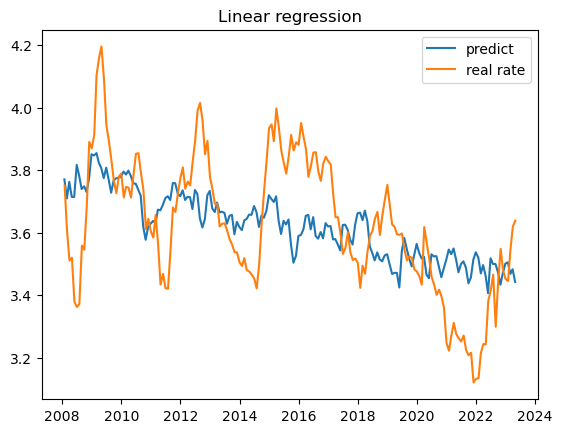

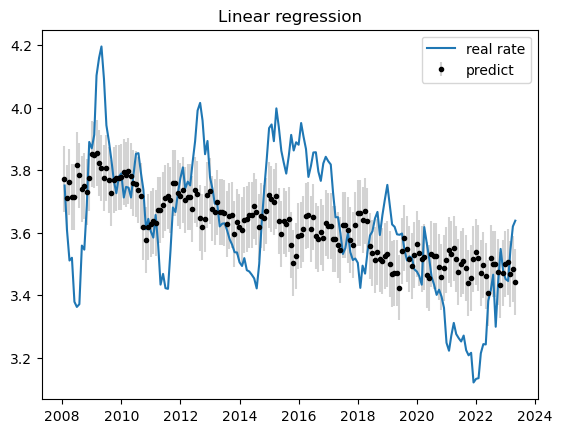

Training MSE: 0.0327
Testing MSE: 0.0347


In [61]:
#### describe = LinearRegression()
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_Evaluate = Model_Evaluate(X_test, y_test, lr, 'Linear regression' )
plot_predict_and_std(startdt, enddt, y, lr.predict(X), 'Linear regression')
fitting_MSE(lr, X_train, X_test, y_train)

### Random forestRegressor

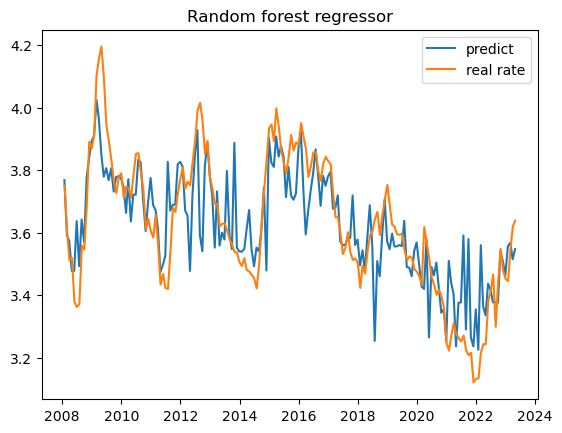

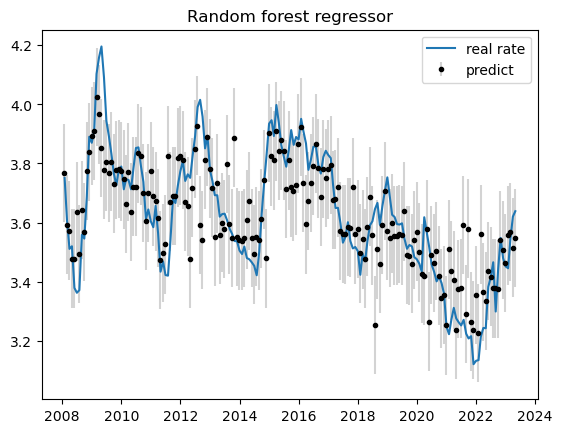

Training MSE: 0.0063
Testing MSE: 0.0564


In [62]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#### Random forest regressor

rf_Evaluate =  Model_Evaluate(X_test, y_test, rf, 'Random forest regressor')
plot_predict_and_std(startdt, enddt, y, rf.predict(X), 'Random forest regressor')
fitting_MSE(rf, X_train, X_test, y_train)

### Evaluate results

In [51]:
pd.DataFrame([rf_Evaluate, lr_Evaluate]) 

,modle_name,MSE,r2_score
0,Random forest regressor,0.019193,0.665517
1,Linear regression,0.034698,0.395323


### drop features with high Correlations between them

In [20]:
end_data = new_df.drop(['Currency_in_Circulation', 'Trade_Foreign_Institutions', 'Trade_Foreign', 'Fruits_And_Vegetables'], axis=1)
corr = end_data.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,exchange_Rate,MCM,Foreign_exchange_Reserves,Trade_Bank,Trade_Residents,Offered_Rate
exchange_Rate,1.00,-0.07,-0.66,-0.10,-0.16,0.06
MCM,-0.07,1.00,0.39,-0.11,-0.06,0.28
Foreign_exchange_Reserves,-0.66,0.39,1.00,0.05,-0.02,-0.34
Trade_Bank,-0.10,-0.11,0.05,1.00,0.60,0.16
Trade_Residents,-0.16,-0.06,-0.02,0.60,1.00,0.10
Offered_Rate,0.06,0.28,-0.34,0.16,0.10,1.00


### Split and scale features

In [21]:
# Split the data into input and output variables
X = end_data.drop(['exchange_Rate'], axis=1)
y = end_data['exchange_Rate']

scale = StandardScaler()
X = scale.fit_transform(X)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear regression

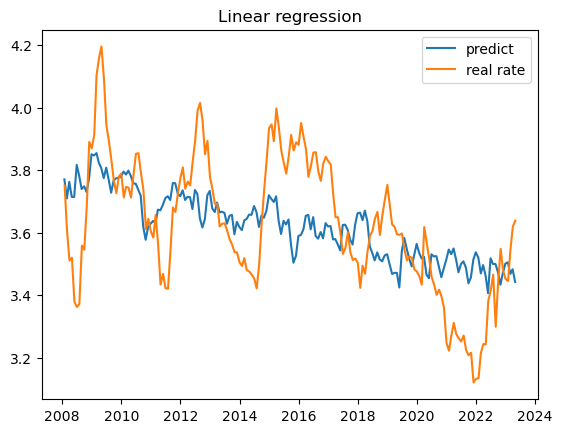

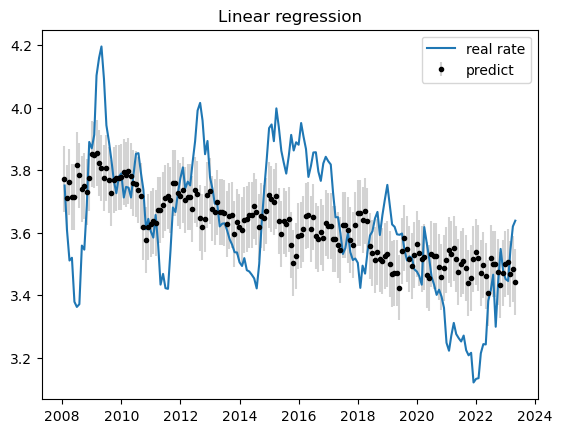

In [63]:
lr = LinearRegression()
lr.fit(X_train, y_train)
title = 'Linear regression'
lr_Evaluate = Model_Evaluate(X_test, y_test, lr, 'Linear regression' )
plot_predict_and_std(startdt, enddt, y, lr.predict(X), title)
#fitting_MSE(lr, X_train, X_test, y_train)

### Random forest regressor

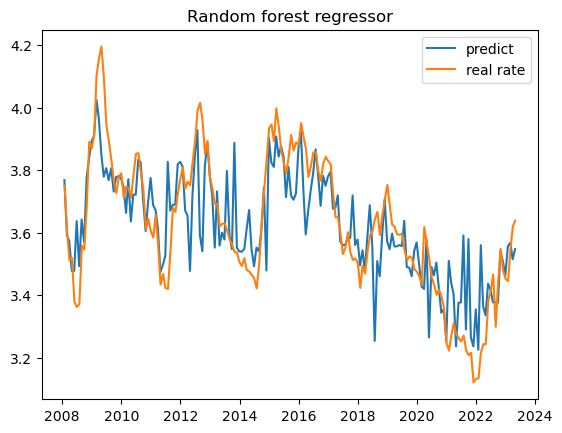

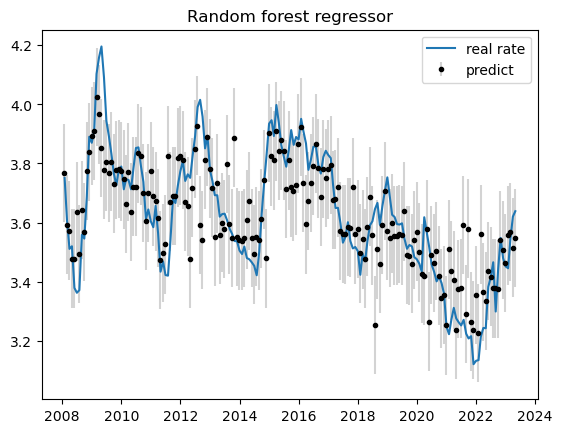

Training MSE: 0.0063
Testing MSE: 0.0564


In [64]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_Evaluate =  Model_Evaluate(X_test, y_test, rf, 'Random forest regressor')
plot_predict_and_std(startdt, enddt, y, rf.predict(X), 'Random forest regressor')
fitting_MSE(rf, X_train, X_test, y_train)

#### Evaluate results

In [24]:
full_eva = pd.DataFrame([rf_Evaluate, lr_Evaluate]) 
X_01 = end_data.drop(['exchange_Rate'], axis=1)
full_eva = add_Adj_R2(full_eva, X_train, X_01) 
full_eva

,modle_name,MSE,r2_score,Adj_R2
0,Random forest regressor,0.007872,0.862809,0.857944
1,Linear regression,0.022482,0.608213,0.594320


#### Checking and correcting adjustments

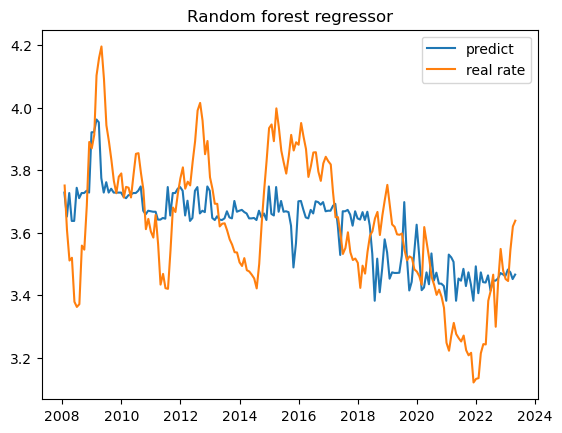

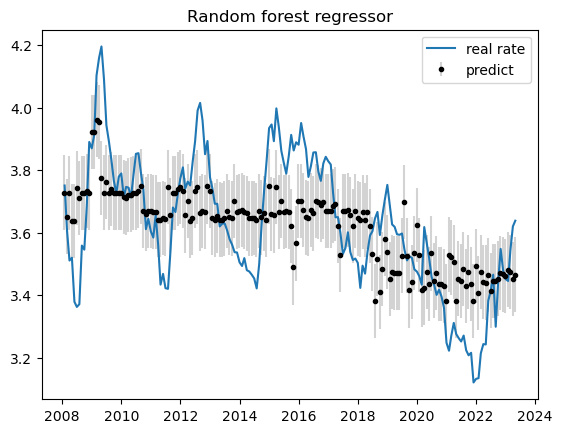

Training MSE: 0.0242
Testing MSE: 0.0381


{'modle_name': 'Random forest regressor',
 'MSE': 0.0380541687500331,
 'r2_score': 0.3368308945575863}

In [65]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth = 3 )
rf.fit(X_train, y_train)
plot_predict_and_std(startdt, enddt, y, rf.predict(X), 'Random forest regressor')
rf_Evaluate = Model_Evaluate(X_test, y_test, rf, 'Random forest regressor')
fitting_MSE(rf, X_train, X_test, y_train)
rf_Evaluate

In [43]:
full_eva = pd.DataFrame([rf_Evaluate, lr_Evaluate]) 
X_01 = end_data.drop(['exchange_Rate'], axis=1)
full_eva = add_Adj_R2(full_eva, X_train, X_01) 
full_eva

,modle_name,MSE,r2_score,Adj_R2
0,Random forest regressor,0.019193,0.665517,0.653655
1,Linear regression,0.022482,0.608213,0.594320


In [67]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# # URL of the XML data
# url = 'https://edge.boi.gov.il/FusionEdgeServer/sdmx/v2/data/dataflow/BOI.STATISTICS/BMB_99/1.0/BNK_99034_LR_MRTG_OL_25.M.W2.99034._T.A.O.S14.A2C.W1.L0._T.P01?locale=en'

# # Make a GET request to the URL
# response = requests.get(url)

# # Parse the XML response
# soup = BeautifulSoup(response.content, 'xml')

# # Find all "Obs" elements
# obs_elements = soup.find_all('Obs')

# # Extract the data from "Obs" elements
# data = []
# for obs in obs_elements:
#     row = {}
#     for attr in obs.attrs:
#         row[attr] = obs.attrs[attr]
#     data.append(row)

# # Convert the data to a pandas DataFrame
# df = pd.DataFrame(data)

# # Print the DataFrame
# print(df)